In [1]:
# !pip install autokeras==1.0.19 --no-deps
# !pip install tables

In [2]:
import tensorflow as tf
import autokeras as ak

import pandas as pd 
import numpy as np 
import os 

from PIL import Image

from sklearn.model_selection import train_test_split

In [3]:
tf.__version__

'2.10.0'

In [4]:
df = pd.read_hdf('training_data/image_arr_worship.h5')

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.head()

,img_arr,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,...,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation,crs:LuminanceNoiseReductionDetail,crs:LuminanceNoiseReductionContrast,crs:GrainSize,crs:GrainFrequency
MJB_1812,"[[[8, 2, 5], [6, 2, 6], [8, 2, 6], [9, 2, 6], ...",5250.0,8.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1421,"[[[98, 98, 144], [95, 100, 144], [90, 102, 142...",3587.0,-5.0,0.95,10.0,-38.0,-10.0,-8.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1755,"[[[8, 6, 13], [8, 7, 14], [10, 8, 13], [12, 6,...",4805.0,27.0,0.00,3.0,-49.0,46.0,11.0,-24.0,10.0,...,14.0,45.0,95.0,-15.0,6.0,-25.0,50.0,0.0,26.0,50.0
MJB_1806,"[[[17, 2, 8], [16, 2, 8], [14, 2, 7], [14, 3, ...",3016.0,-14.0,1.00,33.0,-84.0,-5.0,0.0,-14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1740,"[[[24, 17, 10], [25, 17, 11], [25, 20, 10], [2...",3800.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# df_train = df[['img_arr','crs:Temperature']]

X = df['img_arr'].values
y = df.drop(columns=['img_arr'])
columns = y.columns
# y = df.values

In [8]:
y

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation,crs:LuminanceNoiseReductionDetail,crs:LuminanceNoiseReductionContrast,crs:GrainSize,crs:GrainFrequency
MJB_1812,5250.0,8.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1421,3587.0,-5.0,0.95,10.0,-38.0,-10.0,-8.0,1.0,13.0,-17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1755,4805.0,27.0,0.00,3.0,-49.0,46.0,11.0,-24.0,10.0,40.0,...,14.0,45.0,95.0,-15.0,6.0,-25.0,50.0,0.0,26.0,50.0
MJB_1806,3016.0,-14.0,1.00,33.0,-84.0,-5.0,0.0,-14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1740,3800.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5D4_9081,3480.0,-57.0,1.30,33.0,-68.0,-11.0,28.0,-14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
5D4_9137,4805.0,27.0,1.35,-7.0,-84.0,22.0,40.0,-40.0,0.0,40.0,...,14.0,45.0,95.0,-15.0,6.0,-25.0,50.0,0.0,26.0,50.0
5D4_9079,3224.0,-54.0,1.25,33.0,-84.0,-5.0,0.0,-14.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
5D4_9051,4559.0,-7.0,2.50,13.0,-76.0,-21.0,-13.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0


In [9]:
X = np.stack(X)
X.shape

(143, 500, 500, 3)

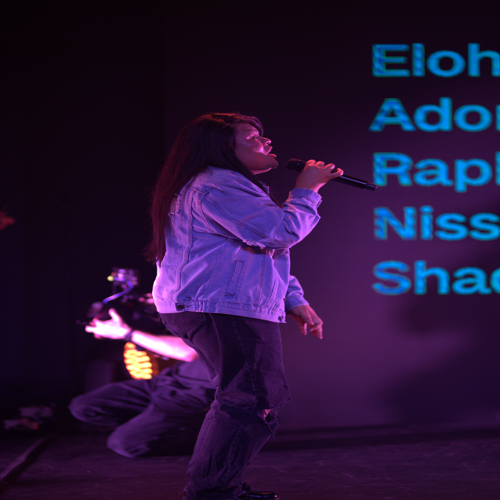

In [10]:
Image.fromarray(X[0])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [12]:
print(x_train.shape)
print(y_train.shape)

(85, 500, 500, 3)
(85, 97)


The second step is to run the ImageRegressor.  It is recommended have more
trials for more complicated datasets.  This is just a quick demo of MNIST, so
we set max_trials to 1.  For the same reason, we set epochs to 2.  You can also
leave the epochs unspecified for an adaptive number of epochs.


In [13]:
# Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True, max_trials=5)
# Feed the image regressor with training data.
reg.fit(x_train, y_train)

Trial 5 Complete [00h 16m 42s]
val_loss: 179576.09375

Best val_loss So Far: 6023.10595703125
Total elapsed time: 06h 29m 07s
INFO:tensorflow:Oracle triggered exit


Epoch 1/95


2023-03-13 22:20:53.108058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 42s 11s/step - loss: 192061.7969 - mean_squared_error: 192061.7969
Epoch 2/95
3/3 [==============================] - 36s 9s/step - loss: 188739.0625 - mean_squared_error: 188739.0625
Epoch 3/95
3/3 [==============================] - 35s 8s/step - loss: 185525.3750 - mean_squared_error: 185525.3750
Epoch 4/95
3/3 [==============================] - 33s 8s/step - loss: 182329.1562 - mean_squared_error: 182329.1562
Epoch 5/95
3/3 [==============================] - 35s 8s/step - loss: 179110.3281 - mean_squared_error: 179110.3281
Epoch 6/95
3/3 [==============================] - 30s 7s/step - loss: 175824.3594 - mean_squared_error: 175824.3594
Epoch 7/95
3/3 [==============================] - 33s 9s/step - loss: 172503.5312 - mean_squared_error: 172503.5312
Epoch 8/95
3/3 [==============================] - 35s 8s/step - loss: 169170.9062 - mean_squared_error: 169170.9062
Epoch 9/95
3/3 [==============================] - 34s 8s/step - loss: 165841.6094 

INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


In [14]:
# Evaluate the best model with testing data.
reg.evaluate(x_test, y_test)

2023-03-13 23:13:32.251139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step - loss: 15499.5430 - mean_squared_error: 15499.5430


[15499.54296875, 15499.54296875]

In [15]:
# Predict with the best model.
y_predict = reg.predict(x_test)

2023-03-13 23:13:50.145711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 758ms/step


In [16]:
y_predict

array([[ 4.92551855e+03,  7.50559998e+01,  4.03348970e+00, ...,
         2.39246440e+00,  1.26031809e+01,  2.36238213e+01],
       [ 3.95340894e+03,  2.13033695e+01,  7.19281375e-01, ...,
         1.66420186e+00,  6.37703705e+00,  2.39012218e+00],
       [ 5.01137646e+03,  2.78285732e+01,  1.25284326e+00, ...,
         2.60341811e+00,  2.50076027e+01,  2.70666237e+01],
       ...,
       [ 6.69234961e+03,  5.83667831e+01,  3.08294249e+00, ...,
         5.13860416e+00,  9.72753811e+00,  2.34462070e+01],
       [ 4.55065186e+03,  1.46758585e+01, -3.78073037e-01, ...,
         8.57674181e-01,  3.77567711e+01,  3.82344322e+01],
       [ 3.76915723e+03,  3.25556946e+01,  1.29624534e+00, ...,
         8.64956737e-01,  1.01340628e+01,  9.32958698e+00]], dtype=float32)

In [17]:
pd.DataFrame(y_predict, columns=columns).head()

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation,crs:LuminanceNoiseReductionDetail,crs:LuminanceNoiseReductionContrast,crs:GrainSize,crs:GrainFrequency
0,4925.518555,75.056000,4.033490,34.572067,-48.991127,13.685135,-21.435825,-20.882221,6.543509,1.054496,...,4.735915,18.946785,33.645660,-8.673756,-0.343552,-8.411250,7.994790,2.392464,12.603181,23.623821
1,3953.408936,21.303370,0.719281,18.049358,-31.610146,-18.051407,-17.938993,-24.482029,-12.392514,-8.304334,...,-1.551961,-1.185069,4.202139,-0.517636,-1.314170,-0.251687,-2.714500,1.664202,6.377037,2.390122
2,5011.376465,27.828573,1.252843,18.155054,-39.847157,6.423274,-28.427122,-18.607193,0.721025,-10.272105,...,-0.852518,1.823589,6.217566,-1.293123,-2.565998,0.365927,14.300688,2.603418,25.007603,27.066624
3,4559.868164,54.344219,2.283646,5.073792,-9.278584,-5.754956,-14.079276,-14.643474,-7.240726,-3.082366,...,-1.349557,-1.504900,-6.064625,0.962305,-1.438307,1.755199,7.031950,1.530566,6.647045,5.806942
4,4498.268066,56.659828,0.536894,4.391955,-21.781664,1.719542,-19.484690,-8.120231,2.876979,3.820597,...,-1.301090,3.638487,12.360734,-0.928389,-0.781958,-1.139975,-3.209347,1.616079,6.497606,7.723869


In [18]:
y_test

,crs:Temperature,crs:Tint,crs:Exposure2012,crs:Contrast2012,crs:Highlights2012,crs:Shadows2012,crs:Whites2012,crs:Blacks2012,crs:Texture,crs:Clarity2012,...,crs:RedHue,crs:RedSaturation,crs:GreenHue,crs:GreenSaturation,crs:BlueHue,crs:BlueSaturation,crs:LuminanceNoiseReductionDetail,crs:LuminanceNoiseReductionContrast,crs:GrainSize,crs:GrainFrequency
MJB_1827,5314.0,-7.0,1.65,13.0,-76.0,-21.0,0.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1482,3691.0,29.0,-0.55,-28.0,0.0,0.0,0.0,-13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1792,3450.0,8.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_9071,4805.0,27.0,0.70,4.0,-39.0,48.0,6.0,-15.0,0.0,40.0,...,14.0,45.0,95.0,-15.0,6.0,-25.0,50.0,0.0,26.0,50.0
MJB_1269,4559.0,-7.0,0.35,13.0,-76.0,32.0,7.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1876,4088.0,-5.0,0.70,66.0,-68.0,-21.0,0.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1809,4559.0,-7.0,1.55,13.0,-76.0,-21.0,0.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0
MJB_1532,7750.0,5.0,-0.05,62.0,-80.0,-32.0,-27.0,48.0,10.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MJB_1517,5468.0,-2.0,0.30,27.0,0.0,74.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5D4_9051,4559.0,-7.0,2.50,13.0,-76.0,-21.0,-13.0,-51.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,41.0,42.0


In [19]:
model = reg.export_model()
print(type(model))

<class 'keras.engine.functional.Functional'>


In [20]:
try:
    model.save('model_autokeras_reg', save_format='tf')
except:
    model.save('model_autokeras_reg.h5')

INFO:tensorflow:Assets written to: model_autokeras_reg/assets


INFO:tensorflow:Assets written to: model_autokeras_reg/assets


In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 500, 500, 3)      0         
 t32)                                                            
                                                                 
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 regression_head_1 (Dense)   (None, 97)                50856033  
                                                                 
Total params: 74,443,745
Trainable params: 74,390,625
Non-trainable params: 53,120
____________________________________________

## Reference
[ImageRegressor](/image_regressor),
[AutoModel](/auto_model/#automodel-class),
[ImageBlock](/block/#imageblock-class),
[Normalization](/block/#normalization-class),
[ImageAugmentation](/block/#image-augmentation-class),
[ResNetBlock](/block/#resnetblock-class),
[ImageInput](/node/#imageinput-class),
[RegressionHead](/block/#regressionhead-class).
